# Linear Regression (multivariate) with Gradient Descent
#### Inspired heavily by Andrew Ng's Machine Learning course.

In [24]:
import numpy
import matplotlib.pyplot as plt

data = numpy.loadtxt("../datasets/linear_regression_data1.csv", delimiter=",")
X = data[:,:-1]
y = data[:,-1]


In [25]:
class LinearRegressionModel():

    def __init__(self, X: numpy.ndarray[float], y: numpy.ndarray[float]):
        self.X = X
        self.y = y
    
    def initialize_theta(self) -> numpy.ndarray[float]:
        theta = numpy.random.rand(self.X.shape[1] + 1)
        return theta
    
    def normalize_features(self, X: numpy.ndarray[float]):
        mu = numpy.mean(self.X)
        sigma = numpy.std(self.X)
        X = numpy.divide((X - mu), sigma)
        X = numpy.concatenate((numpy.ones((len(X), 1)), X), axis=1)
        return X

    def computeCost(self, X: numpy.ndarray[float], theta: numpy.ndarray[float]) -> float:
        J = numpy.sum(
            numpy.square(
                (numpy.matmul(X, theta) - self.y)
                )
            )/(2*len(self.y))
        return J

    def train(self, alpha: float, num_iters: int) -> list[float]:
        cost_history = []
        X = self.normalize_features(self.X)
        theta = self.initialize_theta()
        for _ in range(num_iters):
            dtheta = numpy.zeros_like(theta)
            for itheta in range(len(theta)):
                dtheta[itheta] = alpha/len(self.y)*numpy.sum(
                    numpy.dot(
                        (numpy.matmul(X, theta) - self.y),
                        X[:, itheta]
                    )
                )
            theta = theta - dtheta
            cost_history.append(self.computeCost(X, theta))
        self.trained = True
        return (theta, cost_history)
    
    def predict(self, X: numpy.ndarray[float], theta: numpy.ndarray[float]):
        X = self.normalize_features(X)
        return numpy.matmul(X, theta)


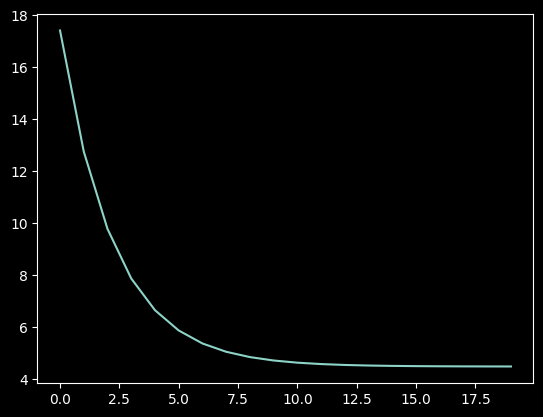

In [26]:
model = LinearRegressionModel(X, y)
theta, loss = model.train(alpha=0.2, num_iters=20)
plt.plot(loss)


In [34]:
import sklearn
import sklearn.pipeline
import sklearn.linear_model

model_sk = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.SGDRegressor(penalty=None),
)

model_sk.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(penalty=None))])

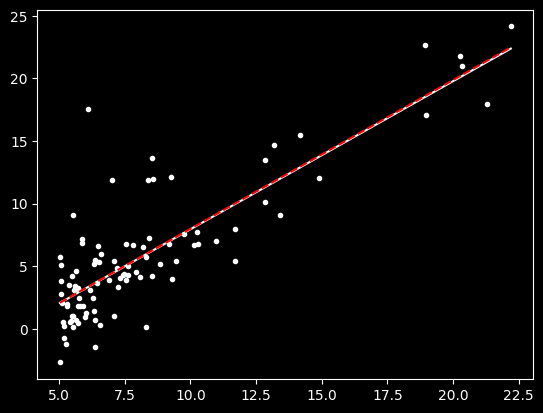

In [35]:
X_model = numpy.array([min(X), max(X)])
y_model = model.predict(X_model, theta)
y_model_sk = model_sk.predict(X_model)
plt.plot(X, y, ".w", X_model, y_model, "-w", X_model, y_model_sk, "--r")
